# **Analysing the layoff dataset from kaggle**
*https://www.kaggle.com/datasets/theakhilb/layoffs-data-2022*

    This dataset was scraped from Layoffs.fyi with the hope to enable Kaggle community to look into analyzing recent mass       layoffs and discover useful insights and patterns.

    Original dataset can be tracked at https://layoffs.fyi/

    Credits: Roger Lee



## 1. Importing and Inspecting the dataset

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("layoffs_data.csv")

In [3]:
df.head(1)

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Swiggy,Bengaluru,Food,600.0,0.1,2023-01-19 00:00:00,https://timesofindia.indiatimes.com/business/i...,3600.0,Unknown,2023-01-20 01:19:50,India,Unknown


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2022 non-null   object 
 1   Location                    2022 non-null   object 
 2   Industry                    2022 non-null   object 
 3   Laid_Off_Count              1399 non-null   float64
 4   Percentage                  1365 non-null   float64
 5   Date                        2022 non-null   object 
 6   Source                      2022 non-null   object 
 7   Funds_Raised                1869 non-null   float64
 8   Stage                       2022 non-null   object 
 9   Date_Added                  2022 non-null   object 
 10  Country                     2022 non-null   object 
 11  List_of_Employees_Laid_Off  2022 non-null   object 
dtypes: float64(3), object(9)
memory usage: 189.7+ KB


*The columns; 'List of Employees laid off' and 'Source' can be removed from the dataset.*

In [5]:
dff=df.drop(['List_of_Employees_Laid_Off','Source'],axis=1)

#### Columns with no employees laid off

In [32]:
dff[dff.Laid_Off_Count.isna()]

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Date_Added,Country
4,Fandom,SF Bay Area,Media,NaN,NaN,2023-01-19 00:00:00,145.0,Series E,2023-01-20 01:21:46,United States
5,Icertis,Seattle,Legal,NaN,NaN,2023-01-19 00:00:00,521.0,Unknown,2023-01-20 04:50:27,United States
6,Magnite,Los Angeles,Marketing,NaN,0.06,2023-01-19 00:00:00,400.0,IPO,2023-01-20 04:46:53,United States
7,Mudafy,Mexico City,Real Estate,NaN,NaN,2023-01-19 00:00:00,13.0,Series A,2023-01-20 01:19:18,United States
8,Personalis,SF Bay Area,Healthcare,NaN,0.30,2023-01-19 00:00:00,225.0,IPO,2023-01-20 01:28:00,United States
...,...,...,...,...,...,...,...,...,...,...
2006,Vacasa,Portland,Travel,NaN,NaN,2020-03-20 00:00:00,526.0,Series C,2020-03-28 20:52:49,United States
2011,Anyvision,Tel Aviv,Security,NaN,NaN,2020-03-19 00:00:00,74.0,Series A,2020-03-30 13:58:13,Israel
2012,Popin,New York City,Fitness,NaN,1.00,2020-03-19 00:00:00,13.0,Unknown,2020-04-06 23:47:12,United States
2013,Tuft & Needle,Phoenix,Retail,NaN,NaN,2020-03-19 00:00:00,0.0,Acquired,2020-04-05 23:23:24,United States


In [31]:
dff.Laid_Off_Count.dropna()

0         600.0
1         300.0
2         115.0
3          46.0
10      10000.0
         ...   
2016       16.0
2018        8.0
2019        6.0
2020       20.0
2021       75.0
Name: Laid_Off_Count, Length: 1399, dtype: float64

In [33]:
dff.Company.nunique()

1655

In [35]:
dff.Location.nunique()

172

<AxesSubplot:ylabel='Laid_Off_Count'>

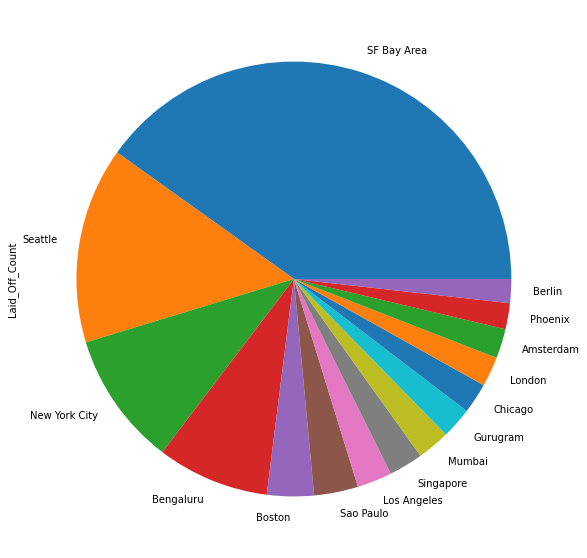

In [50]:
dff.groupby('Location')['Laid_Off_Count'].sum().sort_values(ascending=False)[:15].plot(kind='pie',figsize=(20,10))

<AxesSubplot:ylabel='Laid_Off_Count'>

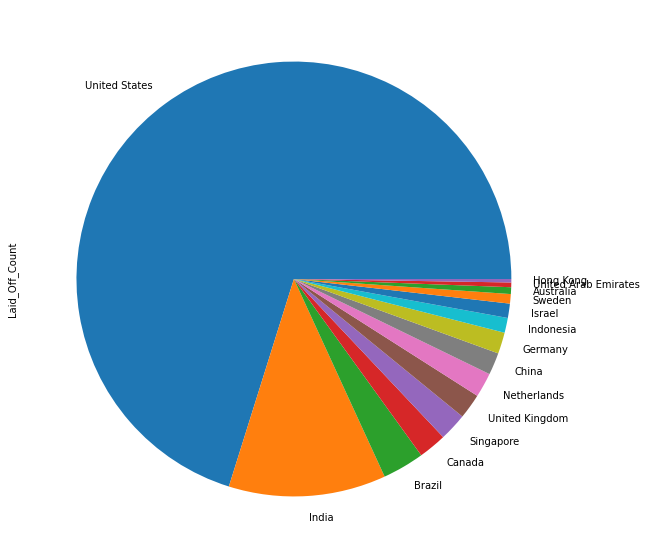

In [51]:
dff.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False)[:15].plot(kind='pie',figsize=(20,10))

In [88]:
import seaborn as sns
dfr = dff[['Laid_Off_Count','Funds_Raised','Company','Stage']]

C:\Users\Manax\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Funds_Raised', ylabel='Laid_Off_Count'>

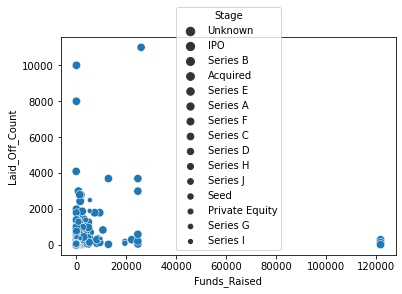

In [89]:
sns.scatterplot(dfr.Funds_Raised,dfr.Laid_Off_Count,size=dfr.Stage)

In [86]:
len(dff.Company.unique())

1655

In [101]:
dfr[dfr.groupby('Company')['Laid_Off_Count'].sum().sort_values(ascending=False)] == 0

KeyError: "None of [Float64Index([18150.0, 11000.0, 10090.0, 10000.0,  7585.0,  4601.0,  4100.0,\n               4084.0,  4000.0,  3900.0,\n              ...\n                  0.0,     0.0,     0.0,     0.0,     0.0,     0.0,     0.0,\n                  0.0,     0.0,     0.0],\n             dtype='float64', length=1655)] are in the [columns]"